# Gradient Descent

This notebook is a Python implementation of the Gradient Descent exercise.

The goal is to implement the gradient descent algorithm with backtracking line search, described in Section 4 of the script.

In [9]:
import numpy as np  # for number manipulation
import matplotlib.pyplot as plt  # for plotting

## Test Functions

Below we provide several examples of functions that you can use to test your implementations. Note that we leave the implmentation of the corresponding gradient functions to you.

In [10]:
def f_1(x):
    return np.square(x[0]) + np.square(x[1])

def grad_1(x):
    return np.array([2 * x[0], 2 * x[1]])

In [11]:
def f_2(x):
    return np.exp(x[0] + x[1])

def grad_2(x):
    return np.exp(x[0] + x[1])* np.array([1,1])

In [50]:
def f_3(x):
    return np.square(x[0]) / x[1] + x[1] 

def grad_3(x):
    x0, x1 = x[0], x[1]
    df_dx0 = 2 * x0 / x1
    df_dx1 = -x0**2 / x1**2 + 1
    return np.array([df_dx0, df_dx1])

In [13]:
def f_4(x):
    return x[0] * np.sin(np.square(x[0]) + np.square(x[1]))

def grad_4(x):
    x0, x1 = x[0], x[1]
    s = x0**2 + x1**2
    df_dx0 = np.sin(s) + 2 * x0**2 * np.cos(s)
    df_dx1 = 2 * x0 * x1 * np.cos(s)
    return np.array([df_dx0, df_dx1])

## Algorithm Implementation

Here we implement the gradient descent algorithm with backtracking line search, presented in the script in Algorithms 3 and 4. The interfaces to the functions are described below in the comments.

In [14]:
def step_size(x, delta_x, f, grad, alpha, beta):
    '''Computes the step size for the gradient descent algorithm via backtracking line search.
    
    Args:
        x: The current point.
        delta_x: Direction of the gradient descent step.
        f: The function being optimized.
        grad: The gradient of f.
        alpha: Real number between 0 and 0.5.
        beta: Real number between 0 and 1.
        
    Returns:
        The step size, i.e., the factor by which to multiply delta_x in the gradient descent step.
    '''
    t = 1
    while f(x+t*delta_x) > f(x) + alpha*t*grad(x)@delta_x:
        t = beta*t
    
    return t

In [48]:
def gradient_descent(f, grad, start, alpha=0.25, beta=0.5, eps=0.001, max_iters=1000):
    '''Computes the trajectory of the gradient descent method when minimizing a given function.
    
    Args:
        f: The function to optimize. Assumed to be strongly convex.
        grad: The gradient of f.
        start: The starting point.
        alpha: Real number between 0 and 0.5. (Detault: 0.25.)
        beta: Real number between 0 and 1. (Default: 0.5.)
        eps: Floating point precision (for comparisons with 0).
        max_iters: Maximum number of iterations to perform.
        
    Returns:
        np.array containing coordinates of points visited by the gradient descent method.
    '''
    # Write your code here
    x_curr = np.array(start)
    it = 0
    x_array = np.array([x_curr])
    while np.linalg.norm(grad(x_curr),2) > eps and it<max_iters:
        #print(x_array)
        delta_x = - grad(x_curr)
        t_k = step_size(x_curr, delta_x, f, grad, alpha, beta)
        x_curr = x_curr +t_k*delta_x
        x_array = np.append(x_array, [x_curr], axis=0)
        it += 1
    return x_array

In [30]:
def plot_trajectory(values, f):
    '''Plots the trajectory of the gradient descent method.
    
    Args:
        values: np.array containing coordinates of points.
        f: The function that was optimized.
    '''
    x = np.linspace(np.min(values[:, 0]), np.max(values[:, 0]), 1000)
    y = np.linspace(np.min(values[:, 1]), np.max(values[:, 1]), 1000)

    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    plt.contourf(X, Y, Z, 50, cmap='Greens')
    plt.colorbar()

    plt.scatter(values[:, 0],values[:, 1])
    plt.plot(values[:, 0],values[:, 1])
    plt.show()

## Testing the Implementation

Here you can test your implementation. We encourage you to test different functions, starting points, and values of the parameters alpha and beta.

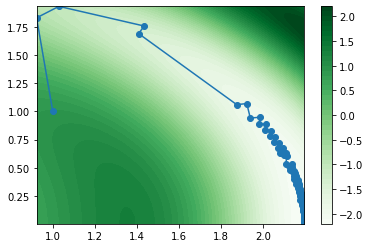

In [56]:
# Set desired parameter values
alpha = 0.25
beta = 0.5
start = [1, 1]

# Run gradient descent algorithm
values = gradient_descent(f_4, grad_4, start, alpha, beta)
#print(values)

# Plot results
plot_trajectory(values, f_4)